In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
from statsmodels.tsa.stattools import adfuller
mlp.style.use("seaborn")
%matplotlib inline

np.random.seed(42)

In [51]:
timeseries = pd.date_range(start="01-01-1960", end="31-12-2021", freq="MS")
timeseries

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=744, freq='MS')

In [52]:
price = np.random.randint(low=1000, size=len(timeseries))

In [53]:
data = {"date": timeseries, "cost": price}

In [54]:
df = pd.DataFrame(data)
df

,date,cost
0,1960-01-01,102
1,1960-02-01,435
2,1960-03-01,860
3,1960-04-01,270
4,1960-05-01,106
...,...,...
739,2021-08-01,625
740,2021-09-01,492
741,2021-10-01,74
742,2021-11-01,412


In [55]:
df.set_index(keys=["date"], inplace=True)
df

,cost
date,
1960-01-01,102
1960-02-01,435
1960-03-01,860
1960-04-01,270
1960-05-01,106
...,...
2021-08-01,625
2021-09-01,492
2021-10-01,74


<AxesSubplot:xlabel='date'>

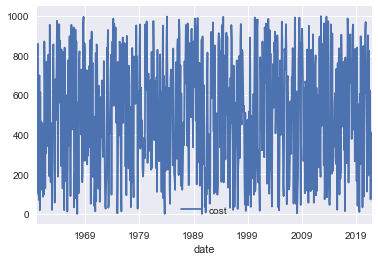

In [56]:
df.plot()

In [57]:
def test_for_stationary (feature, df, window=10):
    means = df[feature].rolling(window=window).mean()
    stds = df[feature].rolling(window=window).std()

    fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    means.plot(ax=ax[0], label="Rolling Mean")
    stds.plot(ax=ax[1], label="Rolling Stds")
    plt.legend(loc="best")

    plt.figure(figsize=(16,6))
    df[feature].plot(color="blue", label="Original")
    means.plot(color="yellow", label="Rolling Mean")
    stds.plot(color="red", label="Rolling StandardDeviation")
    plt.legend(loc="best")

    results = adfuller (df[feature].dropna())
    labels = ["ADF Values", "P Value", "Lags", "No of Observations"]

    for l,r in zip(labels, results):
        print (l, ":", r, sep="\t")

    return ("Stationary Data" if results[1] <= 0.05 else "Non Stationary")
    

ADF Values	:	-25.589464280376582
P Value	:	0.0
Lags	:	0
No of Observations	:	743


'Stationary Data'

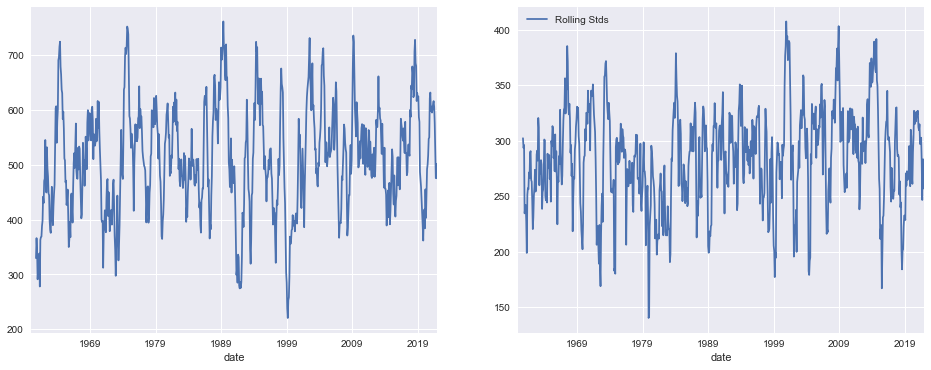

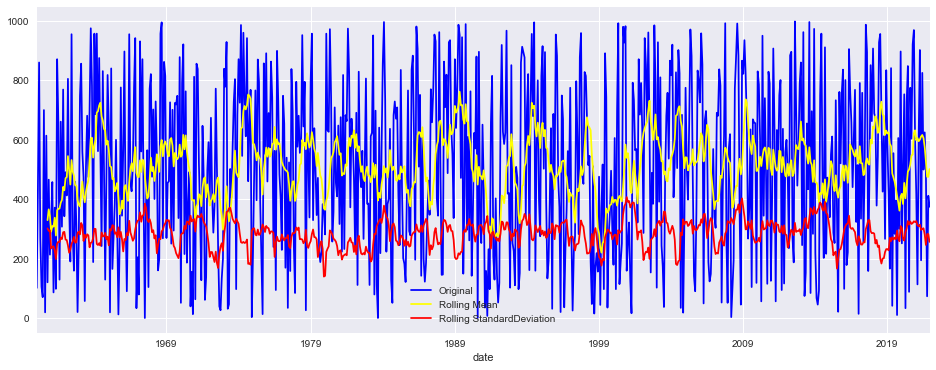

In [58]:
test_for_stationary(feature="cost", df=df)

In [59]:
df_log = np.log(df["cost"])

In [60]:
df["log_transformed"] = df_log

ADF Values	:	-26.481675721017705
P Value	:	0.0
Lags	:	0
No of Observations	:	743


'Stationary Data'

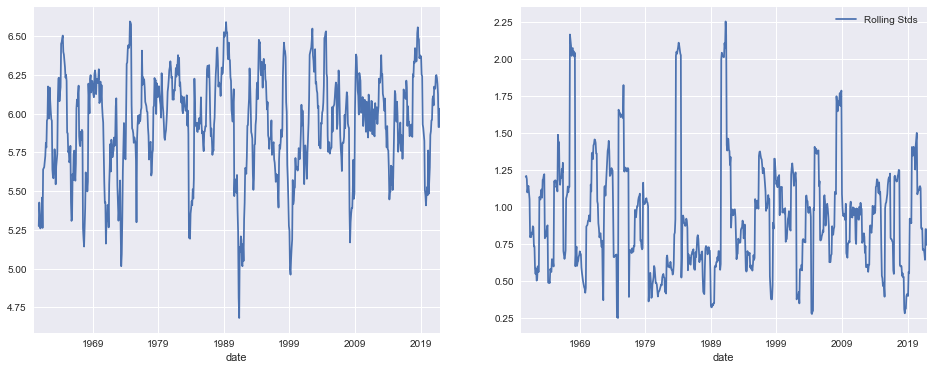

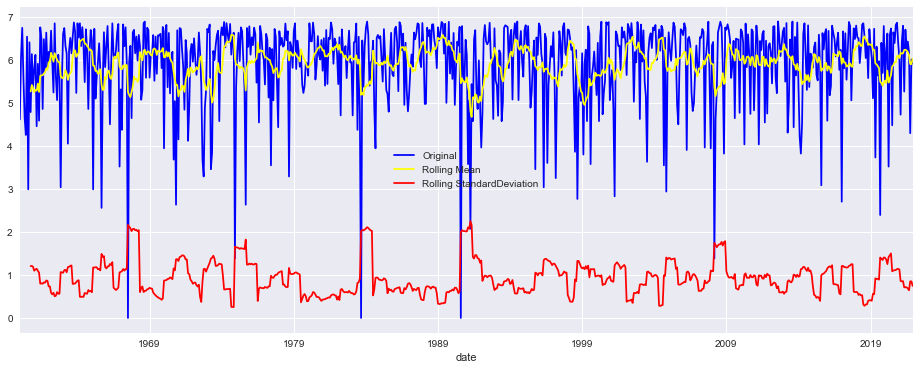

In [61]:
test_for_stationary(feature="log_transformed", df=df)

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
def perform_seasonal_decomposed (param):
    decomposed = seasonal_decompose(param)
    decomposed.plot()


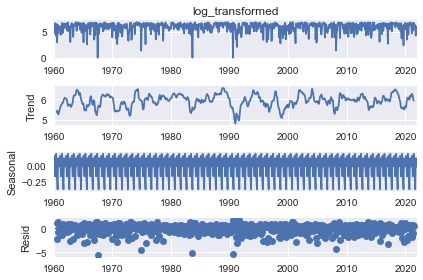

In [64]:
perform_seasonal_decomposed(df["log_transformed"])

In [65]:
df_log_diff = df_log - df_log.shift(1)

In [66]:
df["log_diff"] = df_log_diff

In [67]:
df

,cost,log_transformed,log_diff
date,,,
1960-01-01,102,4.624973,NaN
1960-02-01,435,6.075346,1.450373
1960-03-01,860,6.756932,0.681586
1960-04-01,270,5.598422,-1.158510
1960-05-01,106,4.663439,-0.934983
...,...,...,...
2021-08-01,625,6.437752,0.223144
2021-09-01,492,6.198479,-0.239273
2021-10-01,74,4.304065,-1.894414


<AxesSubplot:xlabel='date'>

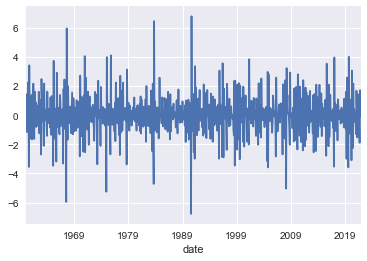

In [68]:
df["log_diff"].plot()

ADF Values	:	-10.87393022520746
P Value	:	1.3465758521285004e-19
Lags	:	16
No of Observations	:	726


'Stationary Data'

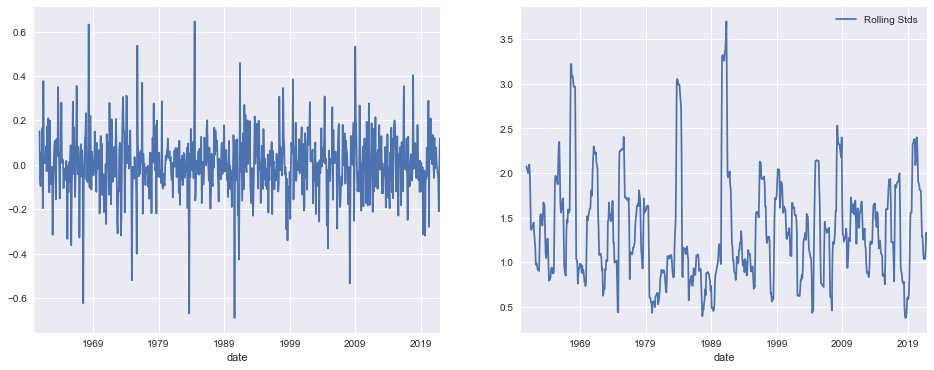

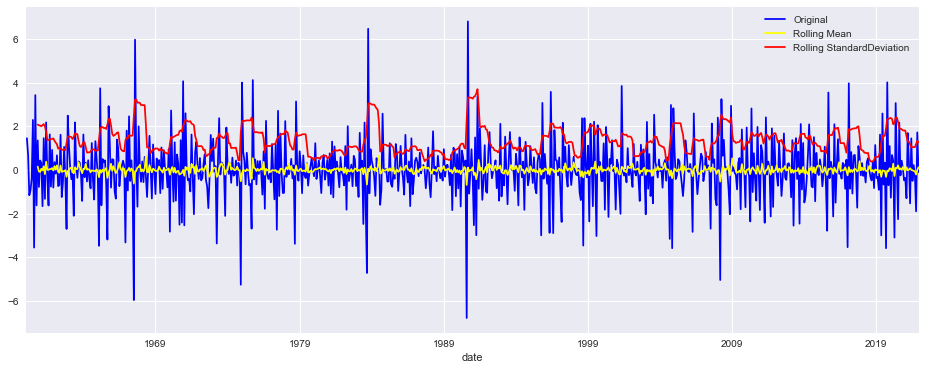

In [69]:
test_for_stationary(feature="log_diff", df=df)

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


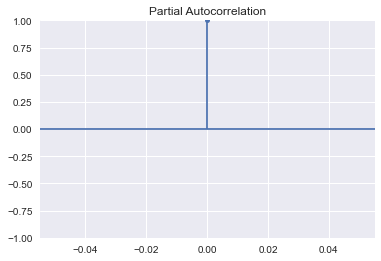

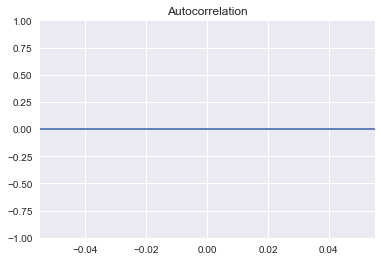

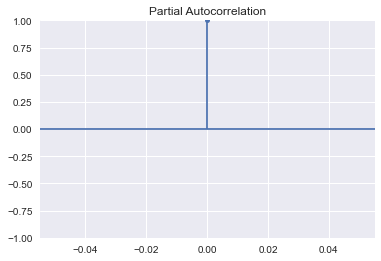

In [71]:
plot_acf(df["log_diff"])
plot_pacf(df["log_diff"])

In [72]:
# !pip install pmdarima
from pmdarima import auto_arima

In [73]:
autoarima_model = auto_arima(
    y=df["log_diff"].dropna(), trace=True, suppress_warnings=True)
autoarima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2628.403, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2423.186, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2626.404, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2348.392, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2312.072, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2280.502, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2268.651, Time=0.09 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2266.651, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2278.502, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  743
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1127.326
Date:                Wed, 10 Nov 2021   AIC                           2266.651
Time:                        23:57:44   BIC                           2294.316
Sample:                             0   HQIC                          2277.316
                                - 743                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7943      0.036    -22.199      0.000      -0.864      -0.724
ar.L2         -0.6063      0.045    -13.585      0.000      -0.694      -0.519
ar.L3         -0.4516      0.046     -9.915      0.000      -0.541      -0.362
ar.L4         -0.3152      0.043     -7.390      0.000      -0.399      -0.232
ar.L5         -0.1361      0.037     -3.664      0.000      -0.209      -0.063
sigma2         1.2158      0.036     33.426      0.000       1.145       1.287
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               896.85
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -1.58
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
from statsmodels.tsa.arima.model import ARIMA

In [75]:
_arima_model = ARIMA(df["log_diff"], 
order=autoarima_model.order, 
seasonal_order=autoarima_model.seasonal_order)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
arima_results = _arima_model.fit()

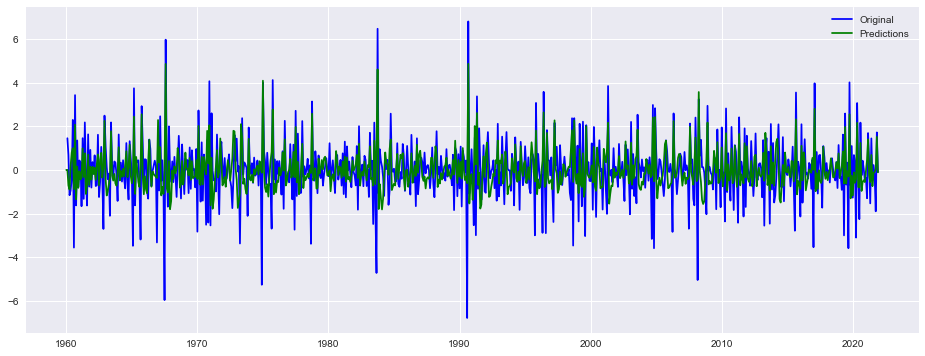

In [77]:
plt.figure(figsize=(16,6))
plt.plot(df["log_diff"], color="blue", label="Original")
plt.plot(arima_results.fittedvalues, color="green", label="Predictions")
plt.legend(loc="best")


In [78]:
# arima_results.fittedvalues
pd.DataFrame({"Log_Diff": df_log_diff, "Predictions": arima_results.fittedvalues})

,Log_Diff,Predictions
date,,
1960-01-01,NaN,0.000350
1960-02-01,1.450373,0.000350
1960-03-01,0.681586,-0.715268
1960-04-01,-1.158510,-0.894809
1960-05-01,-0.934983,0.194824
...,...,...
2021-08-01,0.223144,-0.133768
2021-09-01,-0.239273,-0.093035
2021-10-01,-1.894414,0.035965


In [79]:
arima_diff_predictions = pd.Series(arima_results.fittedvalues, copy=True)
arima_diff_predictions

date
1960-01-01    0.000350
1960-02-01    0.000350
1960-03-01   -0.715268
1960-04-01   -0.894809
1960-05-01    0.194824
                ...   
2021-08-01   -0.133768
2021-09-01   -0.093035
2021-10-01    0.035965
2021-11-01    1.511655
2021-12-01   -0.108152
Length: 744, dtype: float64

In [80]:
arima_diff_predictions_cumsum = arima_diff_predictions.cumsum()
arima_diff_predictions_cumsum

date
1960-01-01    0.000350
1960-02-01    0.000700
1960-03-01   -0.714568
1960-04-01   -1.609377
1960-05-01   -1.414553
                ...   
2021-08-01   -1.481958
2021-09-01   -1.574994
2021-10-01   -1.539029
2021-11-01   -0.027373
2021-12-01   -0.135525
Length: 744, dtype: float64

In [81]:
arima_log_predictions = pd.Series(df_log.iloc[0], index=df_log.index)
arima_log_predictionss = arima_log_predictions.add( arima_diff_predictions_cumsum, fill_value=0 )

In [82]:
arima_log_predictionss

date
1960-01-01    4.625323
1960-02-01    4.625673
1960-03-01    3.910405
1960-04-01    3.015596
1960-05-01    3.210420
                ...   
2021-08-01    3.143015
2021-09-01    3.049979
2021-10-01    3.085944
2021-11-01    4.597600
2021-12-01    4.489448
Length: 744, dtype: float64

In [83]:
plt.figure(figsize=(16,6))
predictions_arima = np.exp(arima_log_predictionss)
predictions_arima

date
1960-01-01    102.035709
1960-02-01    102.071430
1960-03-01     49.919176
1960-04-01     20.401242
1960-05-01     24.789488
                 ...    
2021-08-01     23.173620
2021-09-01     21.114905
2021-10-01     21.888122
2021-11-01     99.245796
2021-12-01     89.072233
Length: 744, dtype: float64

<Figure size 1152x432 with 0 Axes>

In [84]:
df["predictions"] = np.int64(predictions_arima)

In [85]:
df

,cost,log_transformed,log_diff,predictions
date,,,,
1960-01-01,102,4.624973,NaN,102
1960-02-01,435,6.075346,1.450373,102
1960-03-01,860,6.756932,0.681586,49
1960-04-01,270,5.598422,-1.158510,20
1960-05-01,106,4.663439,-0.934983,24
...,...,...,...,...
2021-08-01,625,6.437752,0.223144,23
2021-09-01,492,6.198479,-0.239273,21
2021-10-01,74,4.304065,-1.894414,21


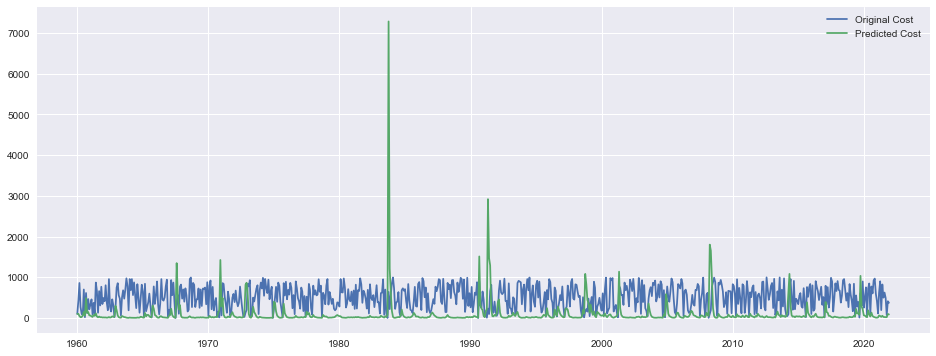

In [86]:
plt.figure(figsize=(16,6))
plt.plot(df["cost"], label="Original Cost")
plt.plot(df["predictions"], label="Predicted Cost")
plt.legend(loc="best")

In [87]:
rmse_error = np.sqrt((sum( predictions_arima - df["cost"] ) ** 2) / len(df))
print ("RMSE Error: ", rmse_error)

RMSE Error:  11310.767844761256


In [88]:
dff = df[["cost"]]

In [89]:
dff

,cost
date,
1960-01-01,102
1960-02-01,435
1960-03-01,860
1960-04-01,270
1960-05-01,106
...,...
2021-08-01,625
2021-09-01,492
2021-10-01,74


In [90]:
double_diff = dff.diff().diff()

In [91]:
dff["double_diff"] = double_diff

/var/folders/j9/0kcvbxzx0q1g6kh9nlh0jknr0000gn/T/ipykernel_16858/1497908211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["double_diff"] = double_diff


ADF Values	:	-13.183710665591411
P Value	:	1.1817989166296983e-24
Lags	:	20
No of Observations	:	721


'Stationary Data'

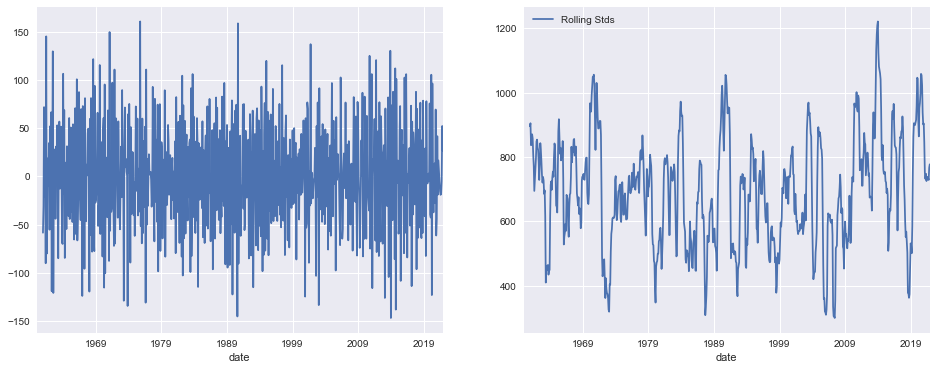

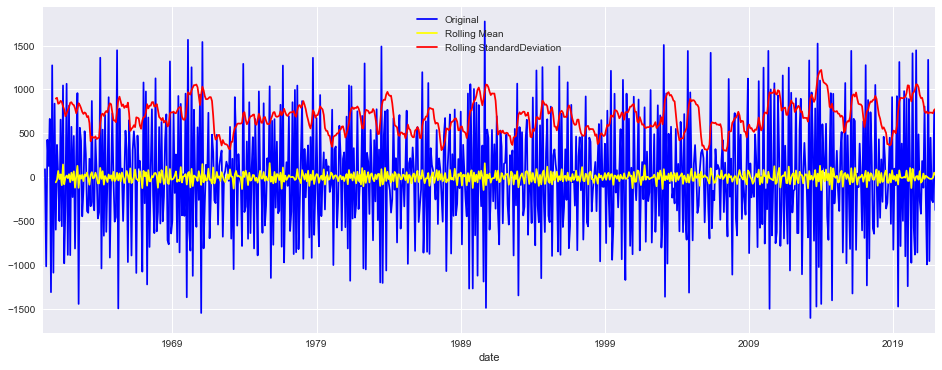

In [92]:
test_for_stationary(feature="double_diff", df=dff)

In [93]:
dff

,cost,double_diff
date,,
1960-01-01,102,NaN
1960-02-01,435,NaN
1960-03-01,860,92.0
1960-04-01,270,-1015.0
1960-05-01,106,426.0
...,...,...
2021-08-01,625,450.0
2021-09-01,492,-258.0
2021-10-01,74,-285.0


In [94]:
autoarima_model2 = auto_arima(double_diff.dropna(), trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11786.358, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11389.904, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11784.359, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11199.204, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11076.727, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=10964.570, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=10923.544, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=10921.545, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=10962.568, Time=0.04 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Ti

In [95]:
autoarima_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  742
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -5454.773
Date:                Wed, 10 Nov 2021   AIC                          10921.545
Time:                        23:57:48   BIC                          10949.201
Sample:                             0   HQIC                         10932.207
                                - 742                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3810      0.038    -36.690      0.000      -1.455      -1.307
ar.L2         -1.3754      0.058    -23.748      0.000      -1.489      -1.262
ar.L3         -1.1073      0.064    -17.215      0.000      -1.233      -0.981
ar.L4         -0.6859      0.058    -11.860      0.000      -0.799      -0.573
ar.L5         -0.2379      0.038     -6.317      0.000      -0.312      -0.164
sigma2      1.414e+05   8351.310     16.931      0.000    1.25e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.93   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.09   Prob(JB):                         0.02
Heteroskedasticity (H):               1.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
_arima_model2 = ARIMA (double_diff.dropna(), order=autoarima_model2.order, seasonal_order=autoarima_model2.seasonal_order)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [97]:
results2 = _arima_model2.fit()

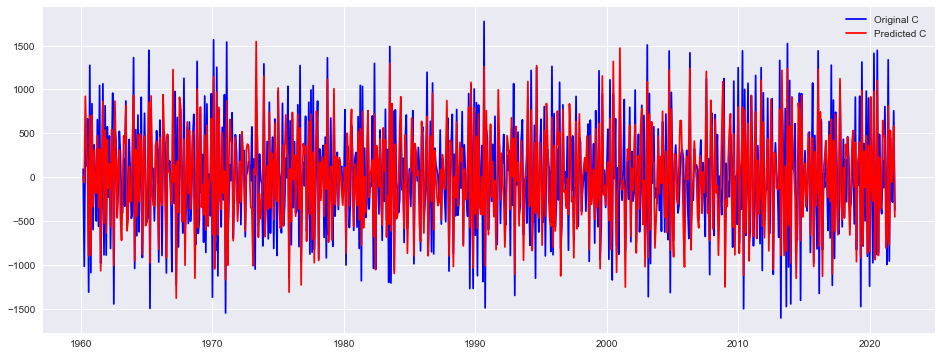

In [98]:
plt.figure(figsize=(16,6))
plt.plot(dff["double_diff"], color="blue", label="Original C")
plt.plot(results2.fittedvalues, color="red", label="Predicted C")
plt.legend(loc="best")

In [114]:
dfff = df[["cost"]]

In [115]:
autoarima_model3 = auto_arima(dfff, trace=True, suppress_warnings=True)
autoarima_model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10556.956, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10552.017, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10551.063, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10551.004, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11597.885, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10553.048, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=10552.971, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10554.974, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11265.578, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -5272.502
Date:                Thu, 11 Nov 2021   AIC                          10551.004
Time:                        00:05:15   BIC                          10564.840
Sample:                             0   HQIC                         10556.337
                                - 744                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    509.6493     11.328     44.991      0.000     487.447     531.851
ma.L1          0.0642      0.037      1.720      0.085      -0.009       0.137
sigma2      8.374e+04   6956.529     12.038      0.000    7.01e+04    9.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                46.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.07
Prob(H) (two-sided):                  0.66   Kurtosis:                         1.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
_arima_model3 = ARIMA(dfff, 
order=autoarima_model3.order, 
seasonal_order=autoarima_model3.seasonal_order)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [118]:
results3 = _arima_model3.fit()

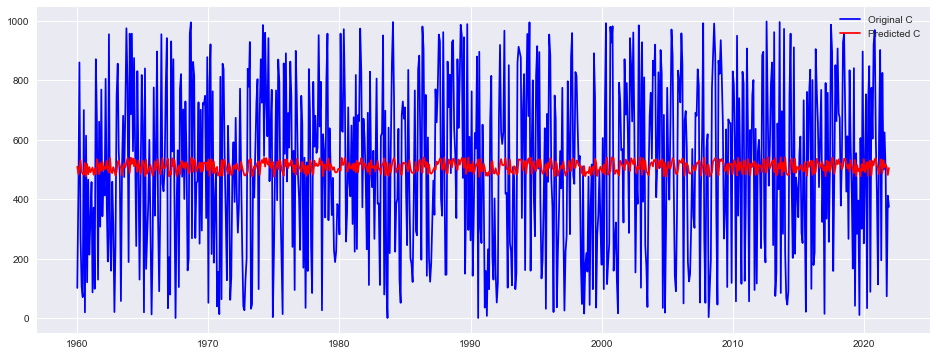

In [120]:
plt.figure(figsize=(16, 6))
plt.plot(dfff["cost"], color="blue", label="Original C")
plt.plot(results3.fittedvalues, color="red", label="Predicted C")
plt.legend(loc="best")


Don't know why ARIMA is not fitting / predicting well for either of these models and datasets